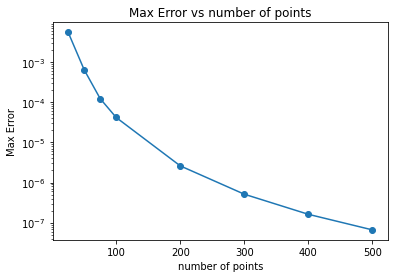

In [631]:
import numpy as np
import matplotlib.pyplot as plt

def main(N):
    
    #Runge's function
    def function(x):
        return 1/(1+25*x**2)

    #x and y points for Runge's function
    y = []
    x = []
    for i in range(N):
        x.append(-1+2*i/(N-1))
        y.append(function(x[i]))

    #creates points inbetween the ones for Runge's function
    #this is used for the interpolation
    grid = []
    #uses twice as many points as the function
    for i in np.linspace(-1,1,2*N):
        grid.append(i)


    #Uses Lagranges interpolation to estimate the function values at any specified point called ex
    def interpolate(ex):
        poly = 0

        #finds the difference from x and ex and takes the four smallest values in order
        #this allows the loop to use the four closest points for any ex value
        four_points = np.argsort(abs(np.array(x) - ex))[:4]
        for j in four_points:
            poly_prod = 1
            for k in four_points:
                if j != k:
                    poly_prod *= (ex - x[k]) / (x[j] - x[k])
            poly += y[j] * poly_prod
        return poly


    
    error = []

    #finds the difference between the interpolation and the funciton using the more 
    #precise grid points
    for a in range(len(grid)):
        error.append(abs(interpolate(grid[a]) - function(grid[a])))
        
    return max(error)
    
#the points that will be looped over in the graph
#max errors will be the y-values
N_values = [25,50,75,100,200,300,400,500]
max_errors = []

# Loop through N values and calculate max errors
#the loop runs the main function and stores its values in max_errors
for N in N_values:
    max_error = main(N)
    max_errors.append(max_error)

# Plot (N, max(error)) in one plot
plt.plot(N_values, max_errors, marker='o')
plt.title("Max Error vs number of points")
plt.xlabel("number of points")
plt.ylabel("Max Error")
plt.yscale('log')
plt.show()

The code defines a function named main(N) that takes an integer N as an argument. The code then generates N equally spaced values of x between -1 and 1, and calculates the corresponding y values by evaluating the Runge's function for each x.
Then it creates a grid of 2*N equally spaced points between -1 and 1. These additional points are be used for interpolation.
The code defines an interpolation function named interpolate(ex) that uses Lagrange's interpolation method to estimate the function values at a specified point ex based on the calculated x and y values. It then computes the interpolation error by subtracting the estimated values using interpolate to the actual values obtained from the Runge's function for the points in the grid. Finally, it plots the interpolation error as a function of the grid points and labels the plot with the number of grid points used. The code then runs the main function three times with different values of N (50, 100, and 200) to compare the interpolation errors for different numbers of grid points. It plots and displays the maximum error for each value of N.

Unsurprisignly, increasing the number of grid points decreases the maximum error. Roundoff error must also begin somewhere past 500 points. 

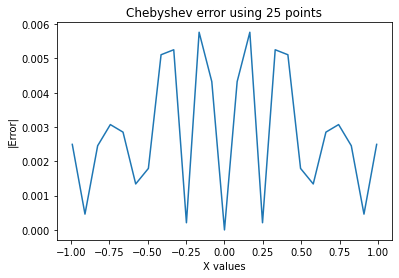

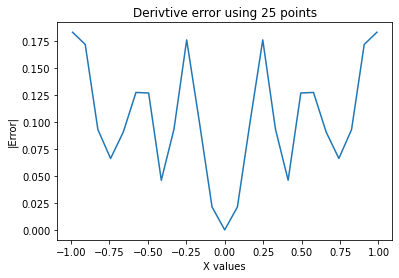

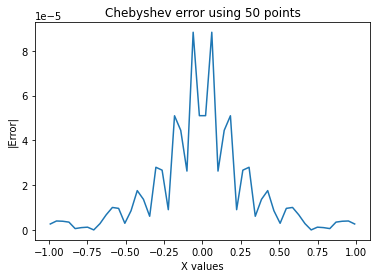

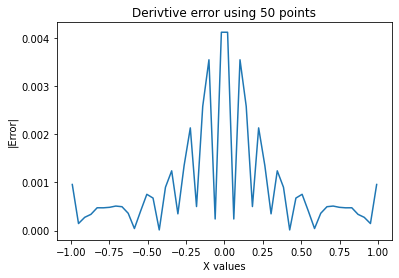

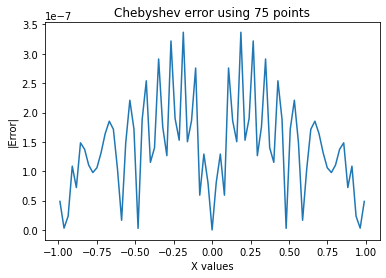

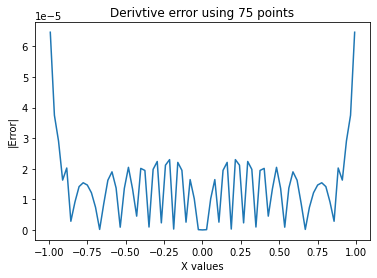

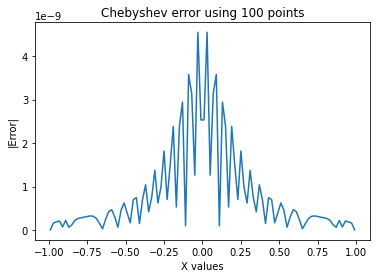

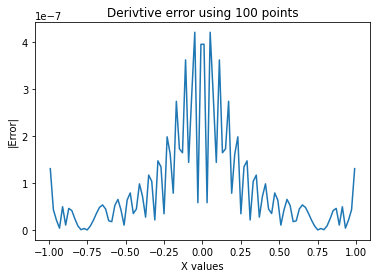

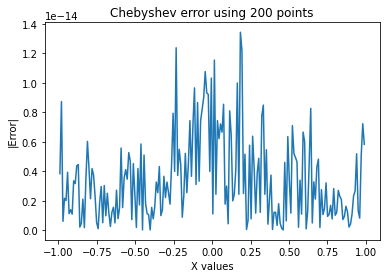

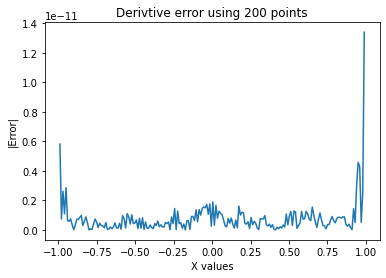

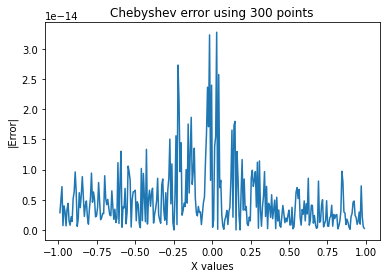

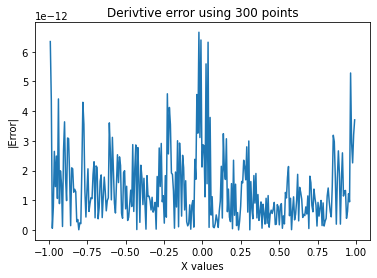

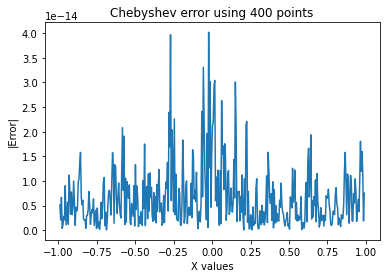

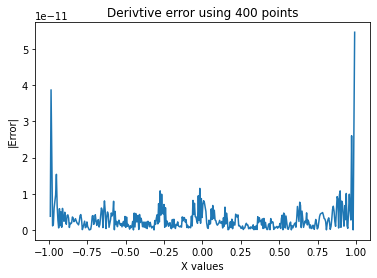

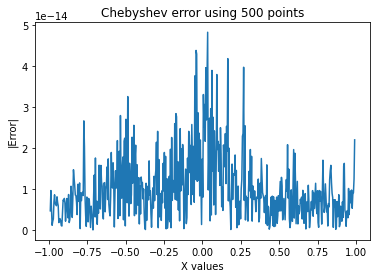

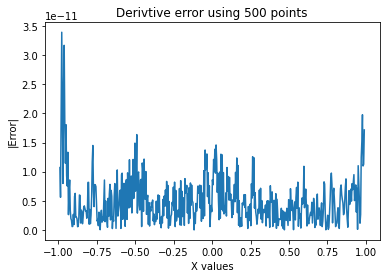

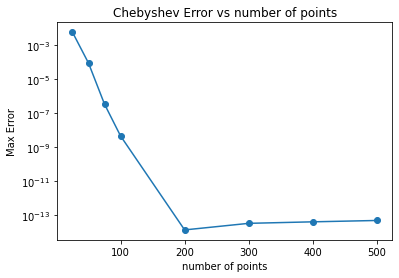

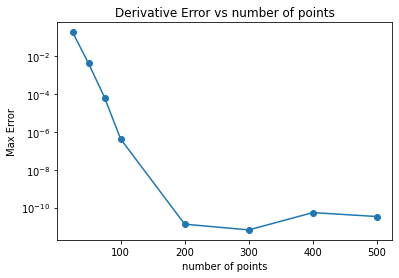

In [632]:
from sympy import *

def main2(points):
    #N = points

    #holds the x and y values as well as the nodes and the values of the Chebyshev polynomial
    x_val = []
    y_val = []
    nodes = []
    poly_val = []

    #Runge's function
    def function(x):
        return 1/(1+25*x**2)

    #fills in the x values
    #this does not contain -1 and 1 so it can be used for the derivative
    for i in np.linspace(-.99,.99,points):
        x_val.append(i)

    #fills in the nodes and y values of the exact function
    for i in range(points):
        nodes.append(np.cos(np.pi*(2*i+1)/(2*points)))
        y_val.append(function(x_val[i]))

    #Chebyshev expansion
    def T(n,x_val):
        return np.cos(n*np.arccos(x_val))

    #weights
    c = []

    #n is used in the homework
    n = points

    #initialize c with zeros
    for _ in range(n):
        c.append(0)
        poly_val.append(0)

    #fills in the weights
    for k in range(n):
        for j in range(points):
            c[k] += 2/n * T(k, nodes[j]) * function(nodes[j])

    c[0] = c[0]/2

    #fills in the Chebyshev approximation
    for j in range(points):
        for k in range(n):        
            poly_val[j] += c[k]*T(k,x_val[j])

    #fills in the error by subtracting the approximation from the exact values
    cheb_error = []
    for i in range(n):
        cheb_error.append(abs(poly_val[i]-y_val[i]))
        
    plt.plot(x_val,cheb_error)
    plt.title(f"Chebyshev error using {points} points")
    plt.ylabel('|Error|')
    plt.xlabel('X values')
    plt.show()

    #Chebyshev derivative
    def dTdx(n,x):
        return (n*np.sin(n*np.arccos(x)))/(np.sqrt(1-x*x))

    deriv_val = []

    #initialize with zeros
    for _ in range(n):
        deriv_val.append(0)

    #fills in the derivative approximation
    for j in range(points):
        for k in range(n):        
            deriv_val[j] += c[k]*dTdx(k,x_val[j]) 

    #exact derivative
    x = Symbol('x') 

    f = (1/(1+25*x**2))

    f1 = diff(f,x)

    deriv_exact = []

    #passing the x  values to the derivative
    #.subs substitutes the symbol x for val
    for val in (x_val):
        deriv_exact.append(f1.subs(x, val))
        
    #fills in the error by subtracting the exact value and the approximation
    deriv_error = []
    for i in range(n):
        deriv_error.append(abs(deriv_exact[i]-deriv_val[i]))
        
    plt.plot(x_val,deriv_error)
    plt.title(f"Derivtive error using {points} points")
    plt.ylabel('|Error|')
    plt.xlabel('X values')
    plt.show()
        
    #the error that will be ploted for both the derivative and Chebyshev approximation
    err = [0, 0]  

    # Assigns the corresponding error to each index
    err[0] = max(cheb_error)
    err[1] = max(deriv_error)
    return err

#the number of points that will be looped over 
#the errors arrays will hold their respective errors 
N_values = [25,50,75,100,200,300,400,500]
cheb_errors = []
deriv_errors = []

# Loop through N values and calculate max errors
#this runs the main loop and stores the respective error
for N in N_values:
    max_error = main2(N)
    cheb_errors.append(max_error[0])
    deriv_errors.append(max_error[1])

#plots the Chebyshev error
plt.plot(N_values, cheb_errors, marker='o')
plt.title("Chebyshev Error vs number of points")
plt.xlabel("number of points")
plt.ylabel("Max Error")
plt.yscale('log')
plt.show()

#plots the derivative error
plt.plot(N_values, deriv_errors, marker='o')
plt.title("Derivative Error vs number of points")
plt.xlabel("number of points")
plt.ylabel("Max Error")
plt.yscale('log')
plt.show()

The code for part two generates a list of x values within the range [-0.99, 0.99] using np.linspace. These values are used for interpolation and derivative calculation. The range excludes -1 and 1 to avoid issues in the derivative calculations. It then computes the Chebyshev nodes, and calculates the corresponding exact function values at these nodes. Then it initializes a list c to store the weights for Chebyshev expansion. It computes the weights c[k] by summing over all nodes and Chebyshev polynomials for each k. After that, it calculates the Chebyshev polynomial approximation at the given x values and stores the results in poly_val. The absolute error is computed between the exact function values and the Chebyshev polynomial approximation and are stored in cheb_error.

The second half defines a function dTdx(n, x) to calculate the derivative of the Chebyshev polynomial, and initializes a list deriv_val to store the derivative approximation values. Then it calculates the derivative approximation at the given x values using the weights c[k] and stores the results in deriv_val. To find the error, it defines the exact derivative of Runge's function using SymPy and calculates the exact derivative values at the same x values. Finally, it computes the absolute error between the exact derivative and the derivative approximation and stores it in deriv_error.

The code then calls the main2 function four times with different values of points (10, 25, 50, and 100) to analyze the Chebyshev interpolation error and derivative error for different numbers of points.

The general trend is an increase in error towards the origin and a decrease away from it, and significant oscillations in the error which may be due somewhat to chance. There is a 10% chance that the last digit in the approximation is the same as the same corresponding digit in the exact value. The derivative error seems to always be about two orders of magnitude larger than the pooynomial error. This makes sense because there are more steps and approximations involved in taking the derivative.

The Chebyshev error vs number of points graph shows that increasing the number of points (N) decreases the max error until about 300 points when roundoff error begins. The Derivative error vs number of points graph shows the same general trend except the roundoff error begins at about 400 points.

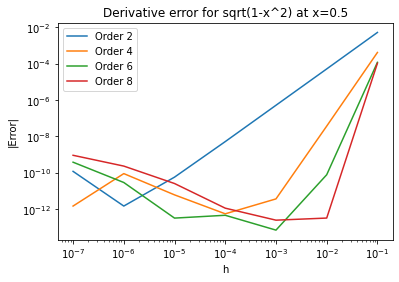

In [630]:
from sympy import finite_diff_weights, S

def main3(N,h):
    def func(x):
        return sqrt(1-x*x)

    #an array to hold the equal spacing of points for finite difference
    spacing = []

    #fills the array with properly spaced points based on the user's inputS
    #this is used to create the equally spaced finite difference values
    a = 0
    if N % 2 == 0:

        #the loop skips zero by filling in the positive half and multiplying it by -1
        for i in range(int(N/2)):
            spacing.append(N/2-a)
            a += 1
            spacing.append(-1.*(i+1))

        #sorts the array from largest (positive) to smallest (negative)
        spacing.sort(reverse = True)

    #the case for odd values
    else:
        for i in range(N):
            spacing.append((N-1)/2-a)
            a += 1

    #sorts from largest (positive) to smallest (negative)
    spacing.sort() 

    #S(0) centers the finite difference method in the middle
    x_target = S(0)

    #creates stencil values based on the users specified level of accuracy
    stencil_array = []
    for j in range(N):
        stencil_array.append((S(spacing[j])))


    # Calculates the central finite difference coefficients
    coefficients = finite_diff_weights(1, stencil_array, x_target)

    #this stores the highest level of accuracy that is output from the 
    #finite_diff_weights function
    coeff = []
    coeff = coefficients[1][-1]

    #creates the finite difference method using the stencils and equally 
    #spaced steps
    output = 0
    d_value = 0.5
    for i in range(N):
        output += coeff[i]*func(d_value+spacing[i]*h)/h
        
    #exact derivative
    x = Symbol('x') 

    f2 = sqrt((1-x**2))

    #takes the derivative of f2
    f3 = diff(f2,x)

    #calculates the value of the derivative at a point
    deriv_exact = f3.subs(x, d_value)
    
    #stores the order and error
    full_output = [0,0]
    full_output[0] = N
    full_output[1] = abs(output-deriv_exact)
    return full_output


h = [0.1,.01,.001,.0001,.00001,.000001,.0000001]
order = [2,4,6,8]
N_val = []
Error3 = []

#fills in the error for each order of accuracy
for o in order:
    Error3 = []
    for i in h:
        main3_val = main3(o,i)
        N_val.append(main3_val[0])
        Error3.append(main3_val[1])
    plt.plot(h, Error3, label = f"Order {o}")
    
plt.title("Derivative error for sqrt(1-x^2) at x=0.5")
plt.xlabel("h")
plt.xscale('log')
plt.ylabel("|Error|")
plt.legend()
plt.yscale('log')

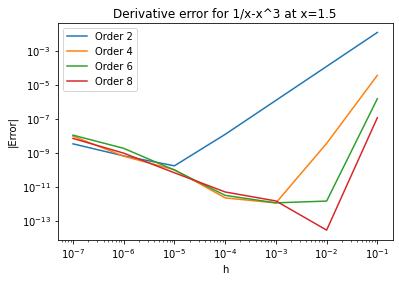

In [629]:
h4 = [0.1,.01,.001,.0001,.00001,.000001,.0000001]
order4 = [2,4,6,8]
N_val4 = []
Error4 = []
#fills in the error for each order of accuracy
for o in order4:
    Error4 = []
    for i in h:
        main4_val = main4(o,i)
        N_val4.append(main4_val[0])
        Error4.append(main4_val[1])
    plt.plot(h4, Error4, label = f"Order {o}")

plt.title(f"Derivative error for 1/x-x^3 at x=1.5")
plt.xlabel("h")
plt.xscale('log')
plt.ylabel("|Error|")
plt.legend()
plt.yscale('log')

The code generates an array spacing that stores equally spaced points for finite difference calculations based on user-defined parameters N (number of points) or h (step size). The points are selected to create a stencil for finite difference calculations. It calculates the finite difference coefficients using the finite_diff_weights function. These coefficients depend on the stencil points and order of accuracy (given by N), and then the highest order of accuracy's coefficients are taken from the computed coefficients. The code then computes the finite difference approximation of the derivative using the finite difference coefficients, the function values at the stencil points, and the step size h. This is done in the loop that iterates over the stencil points. Computing the exact derivative of the function requires SymPy and that valued is stored in deriv_exact.
Then the code calculates the error between the finite difference approximation and the exact derivative. Then it plots the error  over different h values for different orders of accuracy.

The first graph shows the absolute value of the error for $f(x) = \sqrt{1-x^2}$ at x=0.5. Roundoff error begins earlier as the order of accuracy increases. 

The second graph uses the function $f(x) =\frac{1}{x}-x^3$ at the point x = 1.5. Roundoff error seems to begin a bit earlier in general for this graph, but all of the orders seem to have the same exact general increase after roundoff error takes over.

In [620]:
#this is the same code as main3 except it evaluates the derivative of 1/x-x**3 at x=1.5
def main4(N,h):
    def func(x):
        return 1/x-x**3

    #an array to hold the equal spacing of points for finite difference
    spacing = []

    #fills the array with properly spaced points based on the user's inputS
    #this is used to create the equally spaced finite difference values
    a = 0
    if N % 2 == 0:

        #the loop skips zero by filling in the positive half and multiplying it by -1
        for i in range(int(N/2)):
            spacing.append(N/2-a)
            a += 1
            spacing.append(-1.*(i+1))

        #sorts the array from largest (positive) to smallest (negative)
        spacing.sort(reverse = True)

    #the case for odd values
    else:
        for i in range(N):
            spacing.append((N-1)/2-a)
            a += 1

    #sorts from largest (positive) to smallest (negative)
    spacing.sort() 

    #S(0) centers the finite difference method in the middle
    x_target = S(0)

    #creates stencil values based on the users specified level of accuracy
    stencil_array = []
    for j in range(N):
        stencil_array.append((S(spacing[j])))


    # Calculates the central finite difference coefficients
    coefficients = finite_diff_weights(1, stencil_array, x_target)

    #this stores the highest level of accuracy that is output from the 
    #finite_diff_weights function
    coeff = []
    coeff = coefficients[1][-1]

    #creates the finite difference method using the stencils and equally 
    #spaced steps
    output = 0
    d_value = 1.5
    for i in range(N):
        output += coeff[i]*func(d_value+spacing[i]*h)/h
        
    #exact derivative
    x = Symbol('x') 

    f2 = 1/x-x**3

    #takes the derivative of f2
    f3 = diff(f2,x)

    #calculates the value of the derivative at a point
    deriv_exact = f3.subs(x, d_value)
    
    #stores the order and error
    full_output = [0,0]
    full_output[0] = N
    full_output[1] = abs(output-deriv_exact)
    return full_output